Graphics
=================================

## Cargar los datos

In [5]:
df_clean <- read.csv("coronary_disease_clean.csv")
head(df_clean)


sex age currentSmoker cigsPerDay BPMeds prevalentStroke prevalentHyp diabetes
1 1   39  0              0         0      0               0            0       
2 0   46  0              0         0      0               0            0       
3 1   48  1             20         0      0               0            0       
4 0   61  1             30         0      0               1            0       
5 0   46  1             23         0      0               0            0       
6 0   43  0              0         0      0               1            0       
  totChol sysBP diaBP BMI   heartRate glucose TenYearCHD
1 195     106.0  70   26.97 80         77     0         
2 250     121.0  81   28.73 95         76     0         
3 245     127.5  80   25.34 75         70     0         
4 225     150.0  95   28.58 65        103     1         
5 285     130.0  84   23.10 85         85     0         
6 228     180.0 110   30.30 77         99     0

In [6]:
df_clean$sex <- factor(df_clean$sex, levels = c(0,1), labels = c("Female","Male"))
df_clean$currentSmoker <- factor(df_clean$currentSmoker, levels = c(0,1), labels = c("No","Yes"))
df_clean$TenYearCHD <- factor(df_clean$TenYearCHD, levels = c(0,1), labels = c("No CHD","CHD"))
df_clean$diabetes <- factor(df_clean$diabetes, levels = c(0,1), labels = c("No","Yes"))
df_clean$prevalentHyp <- factor(df_clean$prevalentHyp, levels = c(0,1), labels = c("No","Yes"))


## Edad vs reisgo cardiovascular

In [10]:
install.packages("ggplot2")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [12]:
library(ggplot2)
library(dplyr)
library(tidyr)

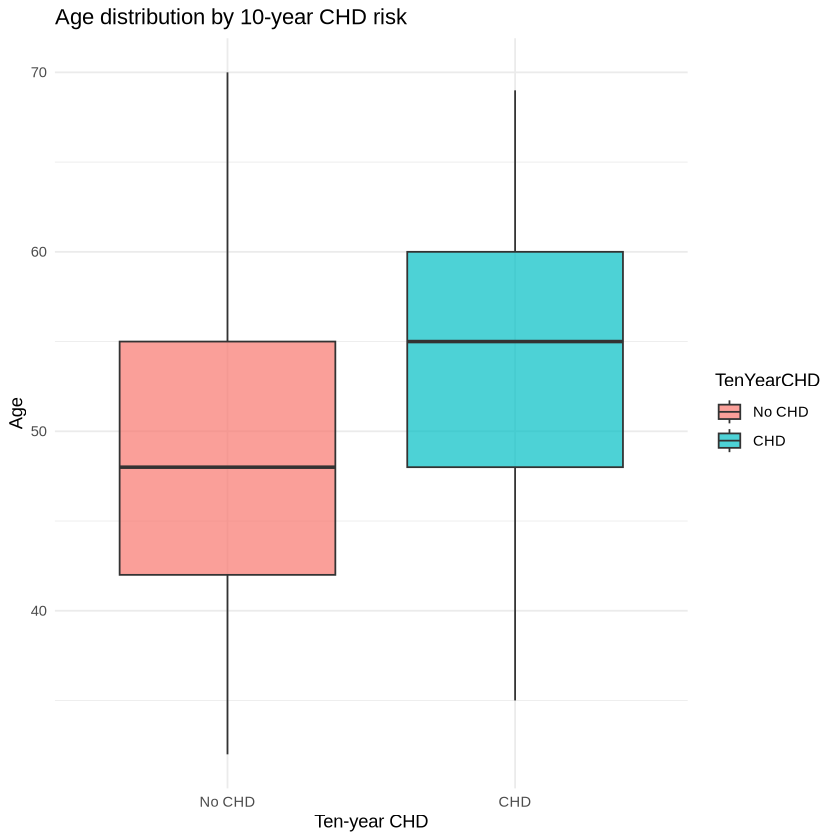

In [13]:
ggplot(df_clean, aes(x = TenYearCHD, y = age, fill = TenYearCHD)) +
  geom_boxplot(alpha = 0.7) +
  theme_minimal() +
  labs(title = "Age distribution by 10-year CHD risk",
       x = "Ten-year CHD",
       y = "Age")


## Prsión arterial: sistólica vs diastólica

`geom_smooth()` using formula = 'y ~ x'


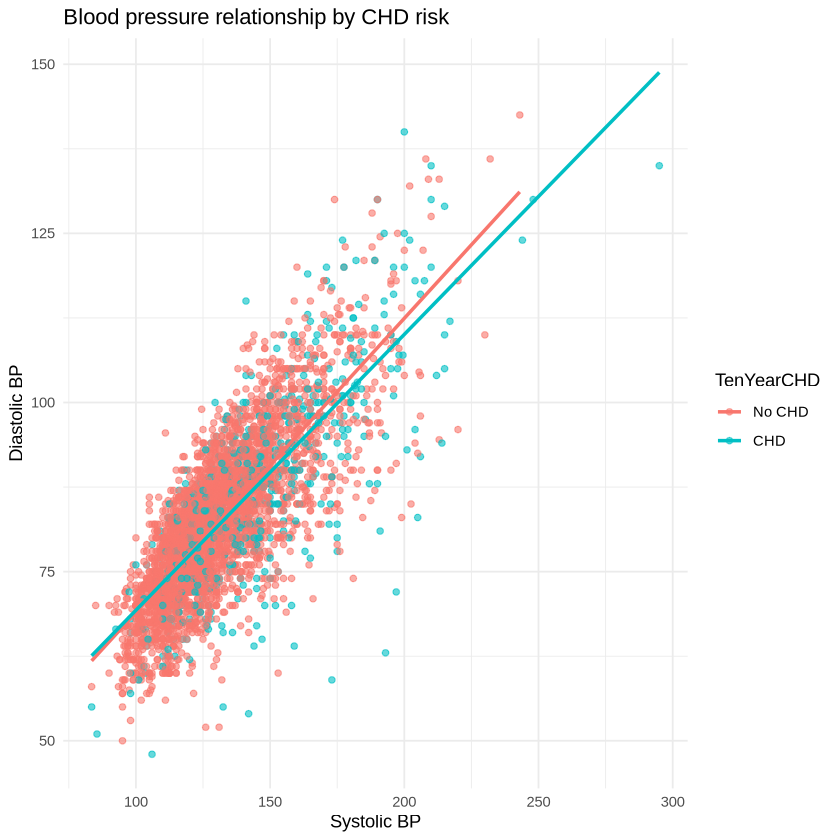

In [14]:
ggplot(df_clean, aes(x = sysBP, y = diaBP, color = TenYearCHD)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  labs(title = "Blood pressure relationship by CHD risk",
       x = "Systolic BP",
       y = "Diastolic BP")


## Colesterol total por sexo y riesgo

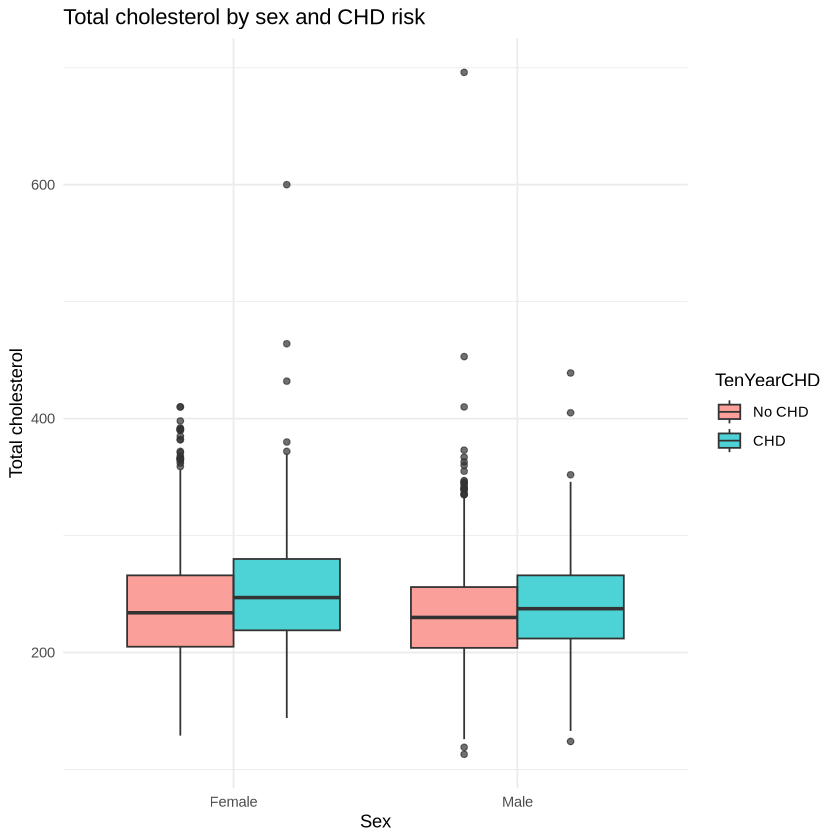

In [15]:
ggplot(df_clean, aes(x = sex, y = totChol, fill = TenYearCHD)) +
  geom_boxplot(position = position_dodge(), alpha = 0.7) +
  theme_minimal() +
  labs(title = "Total cholesterol by sex and CHD risk",
       x = "Sex",
       y = "Total cholesterol")



## BMI vs glucosa (edad como tamaño)

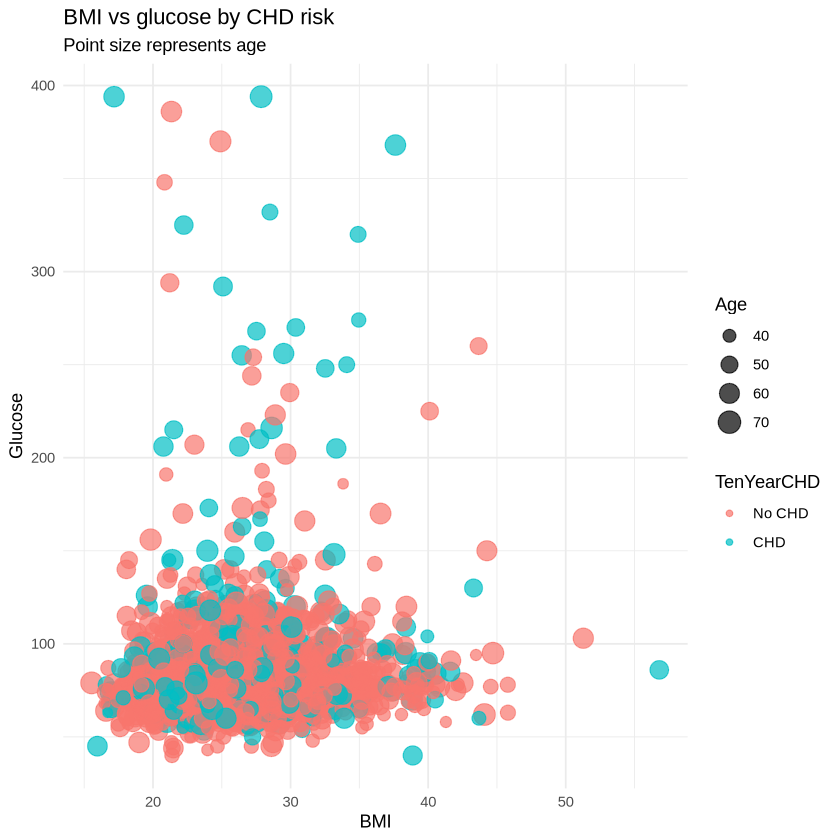

In [16]:
ggplot(df_clean, aes(x = BMI, y = glucose,
                     size = age, color = TenYearCHD)) +
  geom_point(alpha = 0.7) +
  theme_minimal() +
  labs(title = "BMI vs glucose by CHD risk",
       subtitle = "Point size represents age",
       x = "BMI",
       y = "Glucose",
       size = "Age")


## Intensidad del tabaquismo

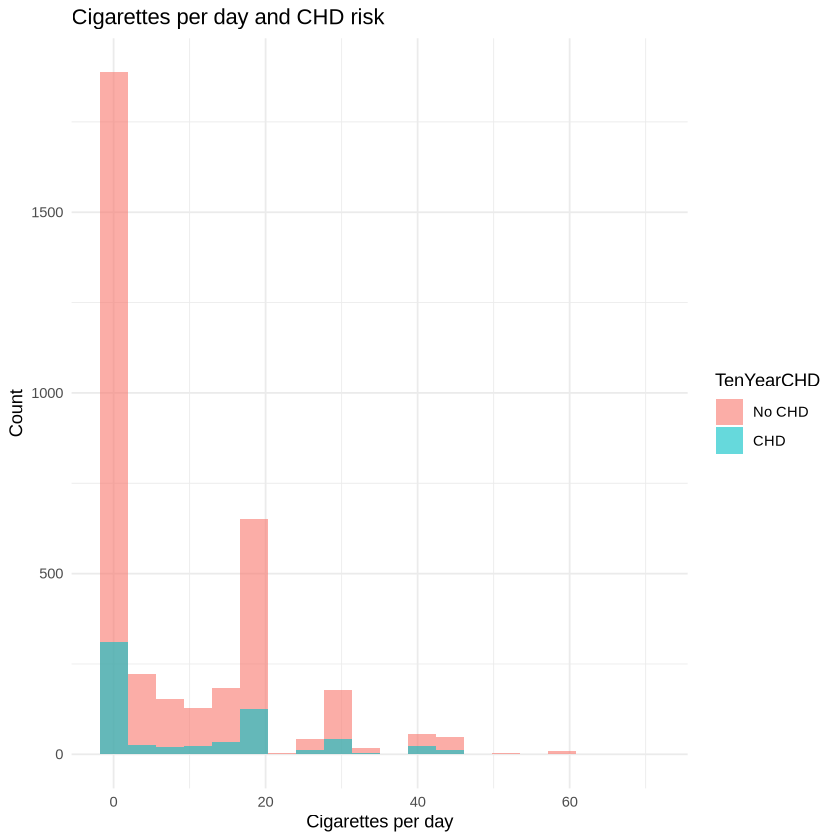

In [17]:
ggplot(df_clean, aes(x = cigsPerDay, fill = TenYearCHD)) +
  geom_histogram(bins = 20, alpha = 0.6, position = "identity") +
  theme_minimal() +
  labs(title = "Cigarettes per day and CHD risk",
       x = "Cigarettes per day",
       y = "Count")


## Densidad de edad por CHD

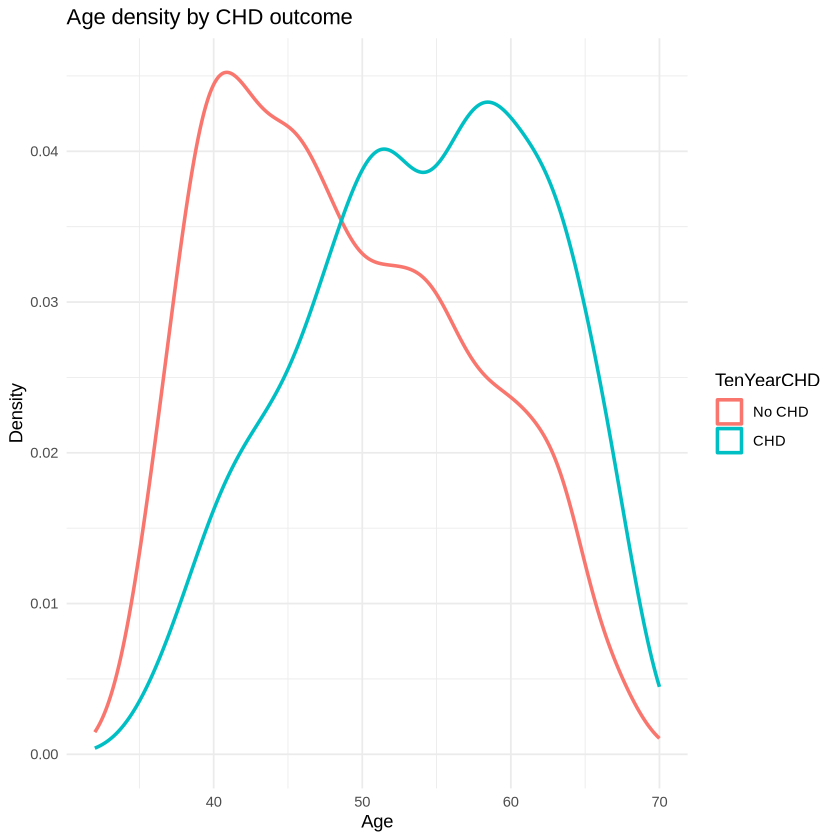

In [18]:
ggplot(df_clean, aes(x = age, color = TenYearCHD)) +
  geom_density(linewidth = 1) +
  theme_minimal() +
  labs(title = "Age density by CHD outcome",
       x = "Age",
       y = "Density")


## Hipertensión previa y proporción de CHD

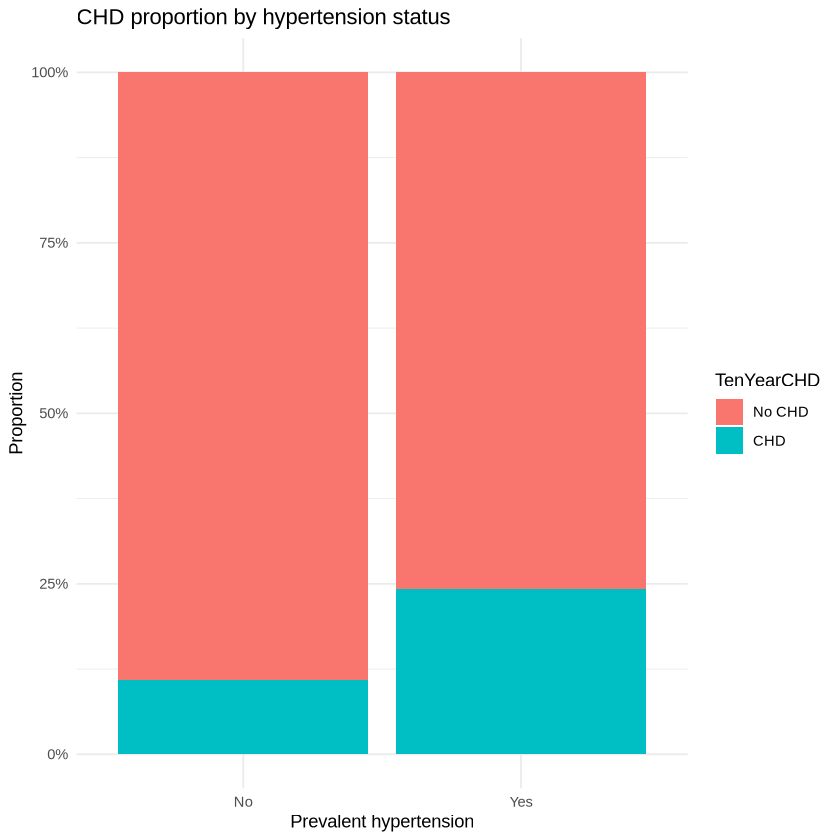

In [19]:
ggplot(df_clean, aes(x = prevalentHyp, fill = TenYearCHD)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal() +
  labs(title = "CHD proportion by hypertension status",
       x = "Prevalent hypertension",
       y = "Proportion")


## Perfil cardiovascular medio

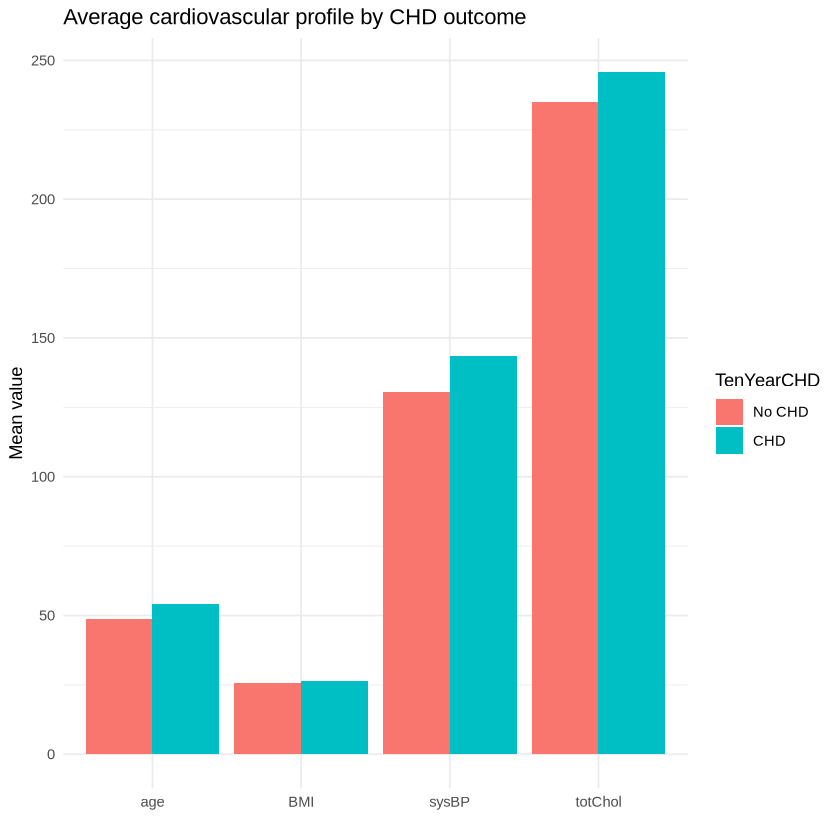

In [21]:
df_clean %>%
  group_by(TenYearCHD) %>%
  summarise(
    age = mean(age),
    sysBP = mean(sysBP),
    totChol = mean(totChol),
    BMI = mean(BMI)
  ) %>%
  pivot_longer(-TenYearCHD) %>%
  ggplot(aes(x = name, y = value, fill = TenYearCHD)) +
  geom_col(position = "dodge") +
  theme_minimal() +
  labs(title = "Average cardiovascular profile by CHD outcome",
       x = "",
       y = "Mean value")


## Frecuencia cardíaca y riesgo

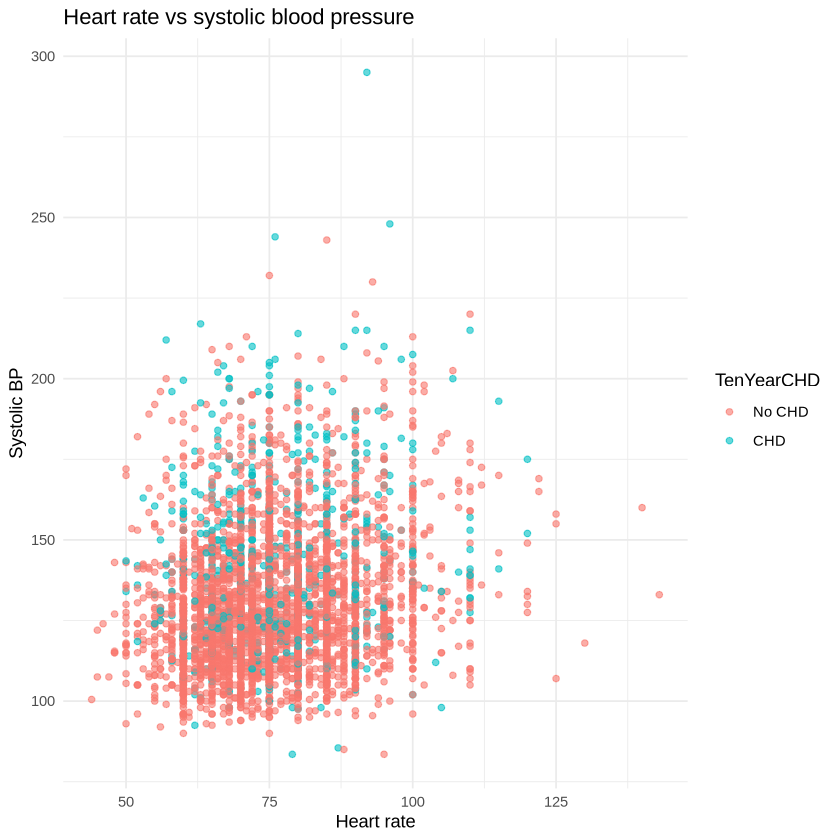

In [22]:
ggplot(df_clean, aes(x = heartRate, y = sysBP, color = TenYearCHD)) +
  geom_point(alpha = 0.6) +
  theme_minimal() +
  labs(title = "Heart rate vs systolic blood pressure",
       x = "Heart rate",
       y = "Systolic BP")
